In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_agents():
    """
    Get set of agents contained in info.txt.
    """
    agent_set = set([])

    with open('info.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        words = line.split('|')
        words = [word.strip() for word in words]

        agent_name = words[1]
        if agent_name not in agent_set:
            agent_set.add(agent_name)

    return agent_set

In [4]:
def get_data(agent_name, task=None):
    """
    Return tuple (xs, ys) where xs is the progress and ys is the score given agent and task.
    If task is not specified, return average score.
    """
    x = []
    y = []

    with open('info.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        indiv_status = [''] * 5
        indiv_progress = [''] * 5
        indiv_score = [''] * 5

        words = line.split('|')
        words = [word.strip() for word in words]

        date, agent, status, score = words[0:4]

        for i in range(5):
            _, indiv_status[i], indiv_progress[i], indiv_score[i] = words[4*i+4:4*i+8]

        if agent == agent_name:
            if not task:
                sum_progress = 0
                sum_count = 0
                for progress in indiv_progress:
                    if progress not in ['N/A', '']:
                        sum_progress += float(progress[:-1])
                        sum_count += 1
                if sum_count > 0:
                    x.append(sum_progress / sum_count if sum_count > 0 else 0)
                    y.append(float(score))
            else:
                if indiv_progress[task - 1] not in ['N/A', ''] and indiv_score[task - 1] != 'pending':
                    x.append(float(indiv_progress[task - 1][:-1]))
                    y.append(float(indiv_score[task - 1]))

    return x, y

In [5]:
def plot_scores(agent_name):
    xs, ys = get_data(agent_name)
    xs1, ys1 = get_data(agent_name, 1)
    xs2, ys2 = get_data(agent_name, 2)
    xs3, ys3 = get_data(agent_name, 3)
    xs4, ys4 = get_data(agent_name, 4)
    xs5, ys5 = get_data(agent_name, 5)
    plt.ylim([0, 10000])
    plt.xlim([0, 100])
    plt.plot(xs, ys, 'k', linewidth=4)
    plt.plot(xs1, ys1)
    plt.plot(xs2, ys2)
    plt.plot(xs3, ys3)
    plt.plot(xs4, ys4)
    plt.plot(xs5, ys5)
    plt.legend(['AVG', '#1', '#2', '#3', '#4', '#5'])
    plt.xlabel('Progress (%)')
    plt.ylabel('Score')
    plt.show()

In [10]:
def compare_agents(agent1, agent2, task=None):
    xs1, ys1 = get_data(agent1, task)
    xs2, ys2 = get_data(agent2, task)
    plt.ylim([0, 10000])
    plt.xlim([0, 100])
    plt.plot(xs1, ys1)
    plt.plot(xs2, ys2)
    plt.legend(['Agent 1', 'Agent 2'])
    plt.xlabel('Progress (%)')
    plt.ylabel('Score')
    plt.show()

In [11]:
get_agents()

{'clr-rainbow-agent:v1',
 'rainbow-agent:v10',
 'rainbow-agent:v11',
 'rainbow-agent:v12',
 'rainbow-agent:v13',
 'rainbow-agent:v14',
 'rainbow-agent:v15',
 'rainbow-agent:v16',
 'rainbow-agent:v7',
 'rainbow-agent:v8',
 'rainbow-agent:v9'}

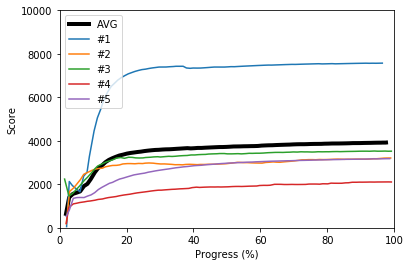

In [12]:
plot_scores('rainbow-agent:v16')

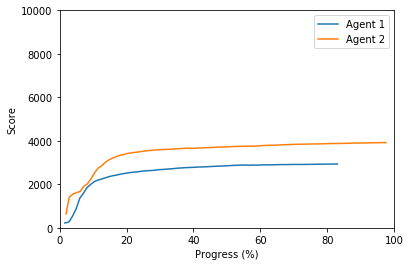

In [15]:
compare_agents('rainbow-agent:v15', 'rainbow-agent:v16')